<a href="https://colab.research.google.com/github/alvinastr/Everin/blob/main/data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Gathering

In [2]:
import pandas as pd

# Load the two datasets
cuisine_df = pd.read_csv('data/raw/cuisine.csv')
instant_df = pd.read_csv('data/raw/instant.csv')

# Combine both datasets into a single DataFrame
combined_df = pd.concat([cuisine_df, instant_df], ignore_index=True)

# Display first few rows of the combined dataset
print("Combined Dataset (cuisine.csv + instant.csv):")
print(combined_df.head())
print("\nInformation of Combined Dataset:")
print(combined_df.info())


Combined Dataset (cuisine.csv + instant.csv):
   id  calories  proteins   fat  carbohydrate                name  \
0   1     280.0       9.2  28.4           0.0                Abon   
1   2     513.0      23.7  37.0          21.3        Abon haruwan   
2   3       0.0       0.0   0.2           0.0           Agar-agar   
3   4      45.0       1.1   0.4          10.8  Akar tonjong segar   
4   5      37.0       4.4   0.5           3.8       Aletoge segar   

                                               image  
0  https://img-cdn.medkomtek.com/PbrY9X3ignQ8sVuj...  
1  https://img-global.cpcdn.com/recipes/cbf330fbd...  
2  https://res.cloudinary.com/dk0z4ums3/image/upl...  
3  https://images.tokopedia.net/img/cache/200-squ...  
4  https://nilaigizi.com/assets/images/produk/pro...  

Information of Combined Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        -------

#Basic Preprocessing

In [3]:
# Remove duplicate rows based on the 'name' column, keeping the first occurrence
combined_df = combined_df.drop_duplicates(subset=['name'], keep='first')

# Verify dataset information after removing duplicates
print("\nCombined Dataset after removing duplicates based on 'name':")
print(combined_df.info())


Combined Dataset after removing duplicates based on 'name':
<class 'pandas.core.frame.DataFrame'>
Index: 2009 entries, 0 to 2009
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            2009 non-null   int64  
 1   calories      2009 non-null   float64
 2   proteins      2009 non-null   float64
 3   fat           2009 non-null   float64
 4   carbohydrate  2009 non-null   float64
 5   name          2009 non-null   object 
 6   image         2009 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 125.6+ KB
None


In [4]:
# Check for missing values in each column
missing_data = combined_df.isnull().sum()
print("\nNumber of missing values in each column:")
print(missing_data)

# Remove rows where the 'image' column contains 'No Image Available'
combined_df = combined_df[combined_df['image'] != 'No Image Available']

# Verify the dataset information after removing rows with 'No Image Available'
print("\nCombined Dataset after removing rows with 'No Image Available' in the 'image' column:")
print(combined_df.info())

# Re-check for missing values in each column after the removal
missing_data = combined_df.isnull().sum()
print("\nNumber of missing values in each column after filtering:")
print(missing_data)


Number of missing values in each column:
id              0
calories        0
proteins        0
fat             0
carbohydrate    0
name            0
image           0
dtype: int64

Combined Dataset after removing rows with 'No Image Available' in the 'image' column:
<class 'pandas.core.frame.DataFrame'>
Index: 1807 entries, 0 to 1886
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1807 non-null   int64  
 1   calories      1807 non-null   float64
 2   proteins      1807 non-null   float64
 3   fat           1807 non-null   float64
 4   carbohydrate  1807 non-null   float64
 5   name          1807 non-null   object 
 6   image         1807 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 112.9+ KB
None

Number of missing values in each column after filtering:
id              0
calories        0
proteins        0
fat             0
carbohydrate    0
name            0
image    

#Exploratory Data Analysis (EDA)

In [5]:
# Display descriptive statistics for numeric columns
print("Descriptive Statistics for Combined Dataset:")
print(combined_df[['calories', 'proteins', 'fat', 'carbohydrate']].describe())

Descriptive Statistics for Combined Dataset:
          calories     proteins          fat  carbohydrate
count  1807.000000  1807.000000  1807.000000   1807.000000
mean    212.934859     8.932219     8.490564     27.456287
std     173.453794    11.182008    13.829803     31.323370
min       0.000000     0.000000     0.000000      0.000000
25%      71.385000     1.600000     0.500000      5.550000
50%     149.000000     4.500000     2.700000     15.000000
75%     350.000000    12.300000    10.155000     47.800000
max     940.000000    83.000000   100.000000    647.000000


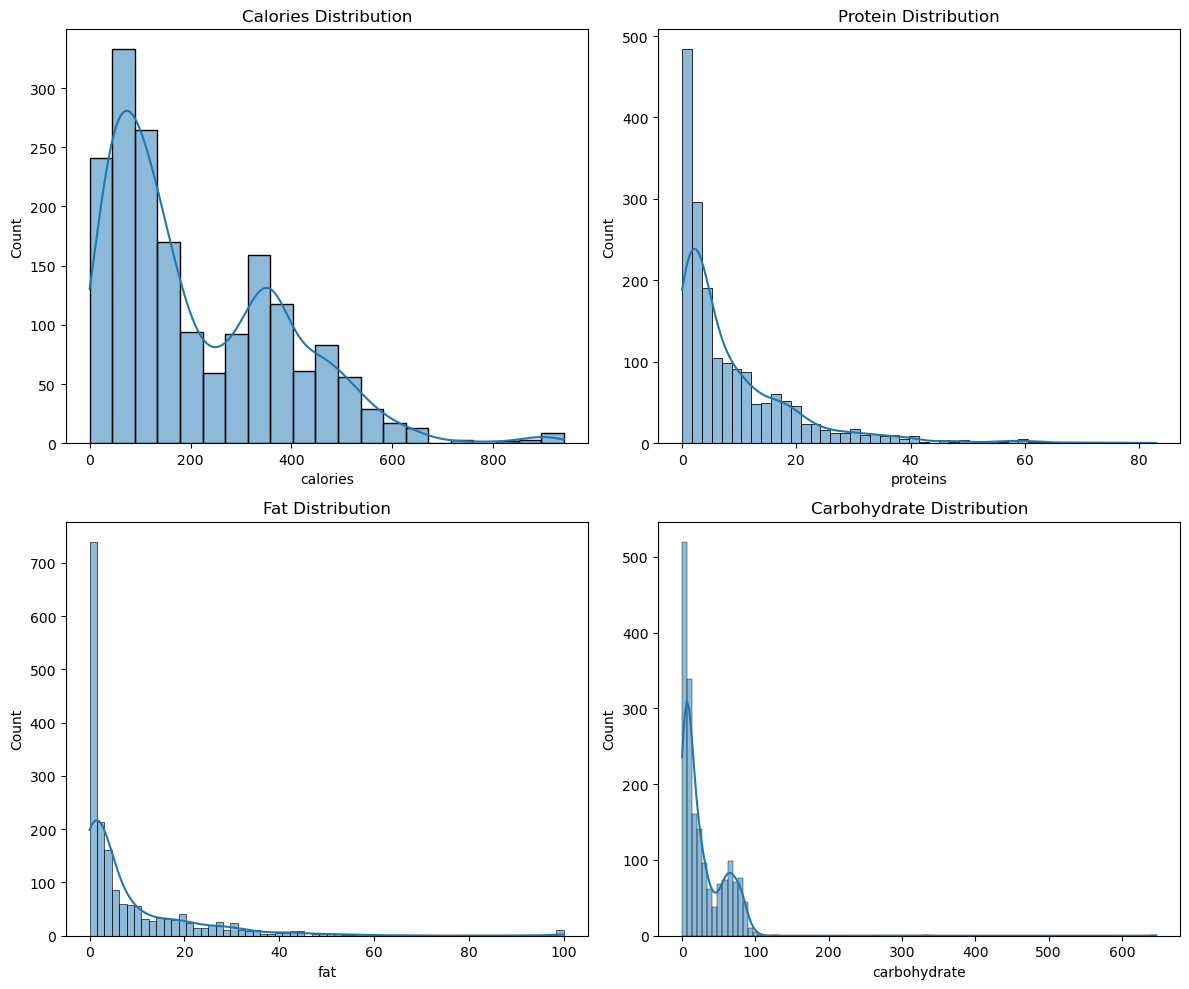

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for nutritional distribution plots
plt.figure(figsize=(12, 10))

# Distribution of Calories
plt.subplot(2, 2, 1)
sns.histplot(combined_df['calories'], kde=True)
plt.title('Calories Distribution')

# Distribution of Proteins
plt.subplot(2, 2, 2)
sns.histplot(combined_df['proteins'], kde=True)
plt.title('Protein Distribution')

# Distribution of Fat
plt.subplot(2, 2, 3)
sns.histplot(combined_df['fat'], kde=True)
plt.title('Fat Distribution')

# Distribution of Carbohydrates
plt.subplot(2, 2, 4)
sns.histplot(combined_df['carbohydrate'], kde=True)
plt.title('Carbohydrate Distribution')

plt.tight_layout()
plt.show()


In [7]:
# Calculate IQR for each nutritional column
Q1 = combined_df[['calories', 'proteins', 'fat', 'carbohydrate']].quantile(0.25)
Q3 = combined_df[['calories', 'proteins', 'fat', 'carbohydrate']].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows with values outside the IQR bounds
combined_df = combined_df[~(
    (combined_df[['calories', 'proteins', 'fat', 'carbohydrate']] < lower_bound) |
    (combined_df[['calories', 'proteins', 'fat', 'carbohydrate']] > upper_bound)
).any(axis=1)]

# Display descriptive statistics after removing outliers
print("Dataset after outlier removal:")
print(combined_df.describe())


Dataset after outlier removal:
                id     calories     proteins          fat  carbohydrate
count  1527.000000  1527.000000  1527.000000  1527.000000   1527.000000
mean    569.377865   171.591932     6.254990     4.475986     27.636549
std     392.668717   137.372929     6.455546     5.927977     27.266212
min       1.000000     0.000000     0.000000     0.000000      0.000000
25%     233.500000    61.000000     1.300000     0.400000      6.080000
50%     481.000000   121.000000     3.600000     1.800000     15.000000
75%     912.500000   280.500000     9.500000     6.000000     49.300000
max    1346.000000   640.000000    28.300000    24.500000    100.000000


Correlation Matrix:
              calories  proteins       fat  carbohydrate
calories      1.000000  0.285696  0.551818      0.825343
proteins      0.285696  1.000000  0.296528     -0.005306
fat           0.551818  0.296528  1.000000      0.204300
carbohydrate  0.825343 -0.005306  0.204300      1.000000


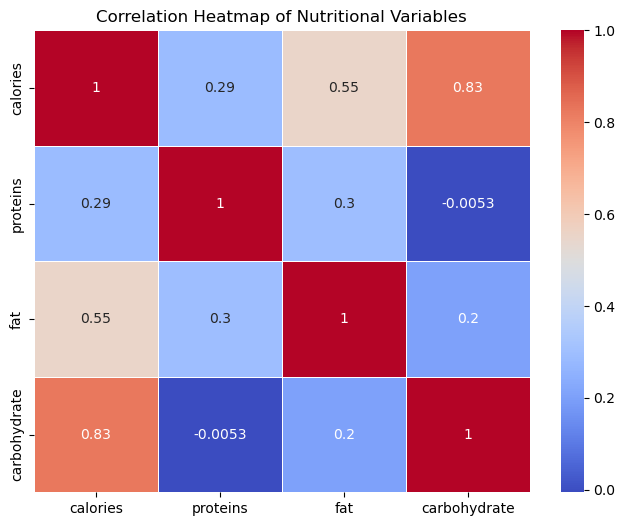

In [8]:
# Generate the correlation matrix for nutritional variables
correlation_matrix = combined_df[['calories', 'proteins', 'fat', 'carbohydrate']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Nutritional Variables')
plt.show()


#Advanced Preprocessing

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the datasets (pastikan file path-nya benar)
cuisine_df = pd.read_csv('data/raw/cuisine.csv')
instant_df = pd.read_csv('data/raw/instant.csv')

# Combine both datasets into a single DataFrame
combined_df = pd.concat([cuisine_df, instant_df], ignore_index=True)

# Remove duplicate rows based on the 'name' column, keeping the first occurrence
combined_df = combined_df.drop_duplicates(subset=['name'], keep='first')

# Check for and remove rows with missing values if necessary
combined_df = combined_df.dropna(subset=['name'])

# Function to categorize products as Food or Drink based on keywords in the 'name' column
def categorize_product(name):
    name = name.lower()  # Convert product name to lowercase for easier keyword matching
    # Keywords for products that are likely drink items
    if ("minuman" in name or "drink" in name or "teh" in name or "kopi" in name or
          "susu" in name or "milk" in name or "juice" in name or "jus" in name or
          "coffee" in name or "tea" in name or "soda" in name or
          "soft drink" in name or "carbonated" in name or
          "cola" in name or "botol" in name or "smoothie" in name or
          "shake" in name or "lemonade" in name or "cider" in name or "cocktail" in name or
          "tonic" in name or "water" in name):
        return "Drink"
    # If no keywords match, default to "Food"
    else:
        return "Food"

# Apply the function to create a new 'category' column
combined_df['category'] = combined_df['name'].apply(categorize_product)

# Use NLP for better categorization
X = combined_df['name']  # Features (product names)
y = combined_df['category']  # Labels (categories)

# Vectorize the product names using TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict the categories on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Add the predicted category to the DataFrame
combined_df['predicted_category'] = model.predict(X_tfidf)

# Verify the distribution of each category
print("\nNumber of products per category:")
print(combined_df['category'].value_counts())

# Display a sample of products in each category to validate categorization
print("\nSample products in the Food category:")
print(combined_df[combined_df['category'] == 'Food'][['name', 'calories', 'proteins', 'fat', 'carbohydrate']].head(20))

print("\nSample products in the Drink category:")
print(combined_df[combined_df['category'] == 'Drink'][['name', 'calories', 'proteins', 'fat', 'carbohydrate']].head(20))

Accuracy: 0.9270315091210614
Classification Report:
               precision    recall  f1-score   support

       Drink       1.00      0.17      0.29        53
        Food       0.93      1.00      0.96       550

    accuracy                           0.93       603
   macro avg       0.96      0.58      0.63       603
weighted avg       0.93      0.93      0.90       603

Confusion Matrix:
 [[  9  44]
 [  0 550]]

Number of products per category:
category
Food     1841
Drink     168
Name: count, dtype: int64

Sample products in the Food category:
                             name  calories  proteins   fat  carbohydrate
0                            Abon     280.0       9.2  28.4           0.0
1                    Abon haruwan     513.0      23.7  37.0          21.3
2                       Agar-agar       0.0       0.0   0.2           0.0
3              Akar tonjong segar      45.0       1.1   0.4          10.8
4                   Aletoge segar      37.0       4.4   0.5           3.

In [11]:
combined_df.to_csv('new_dataset.csv', index=False)